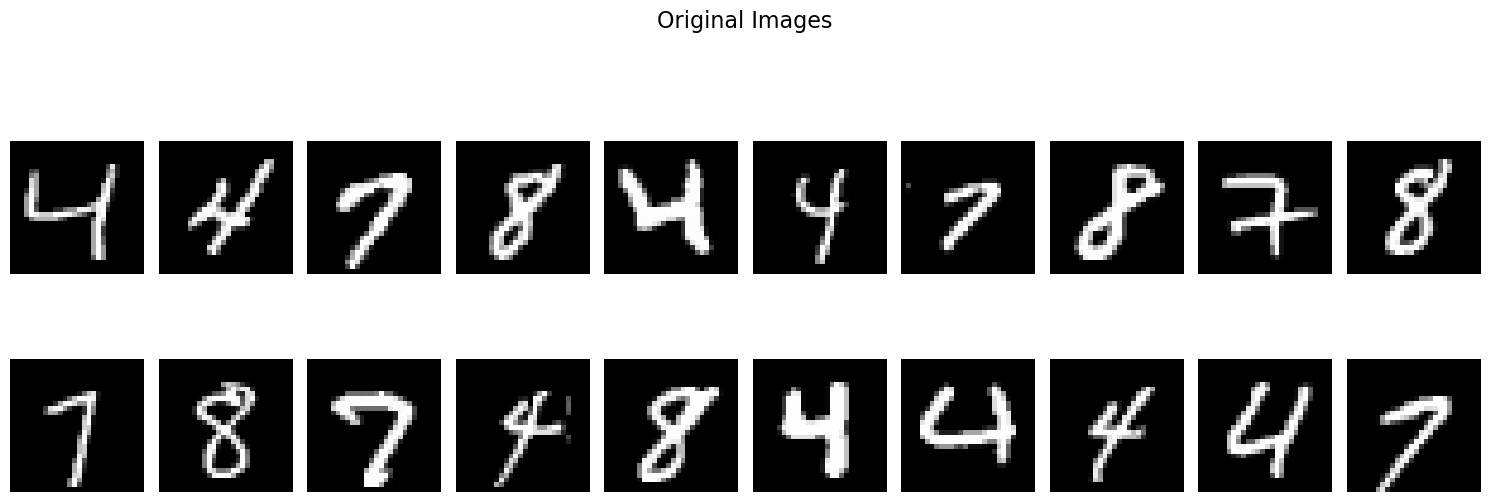

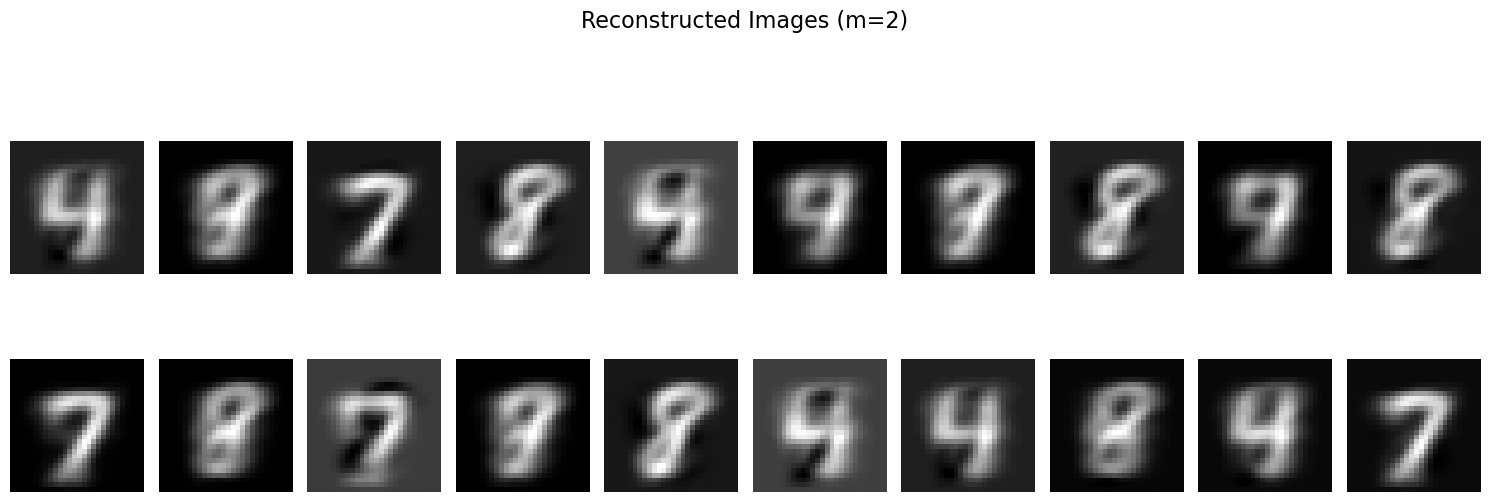

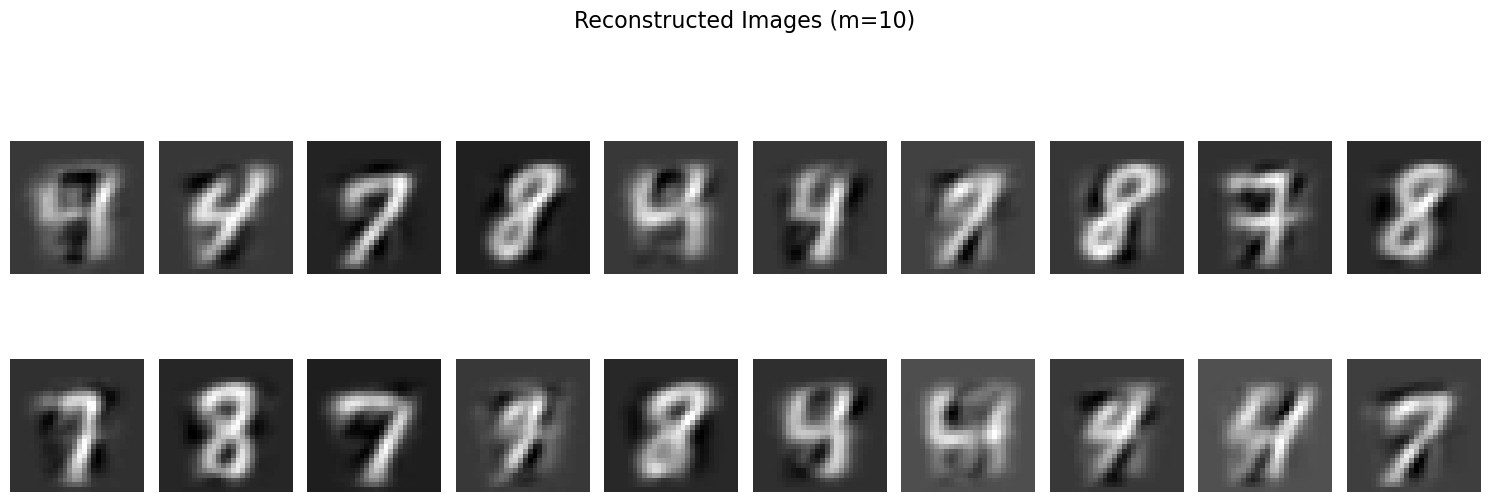

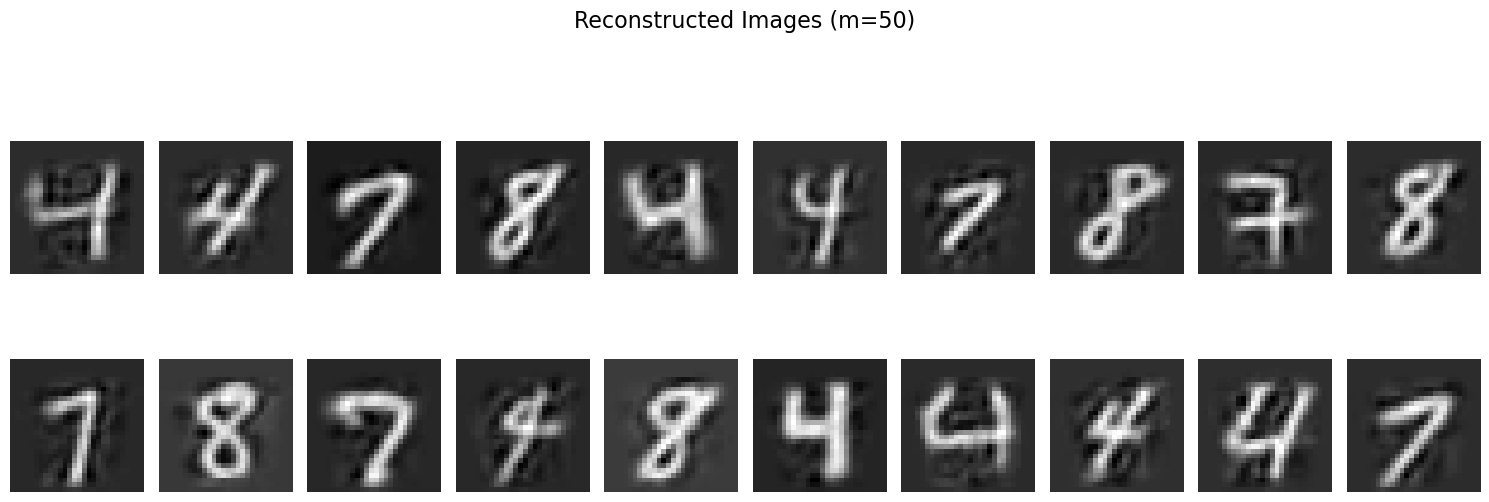

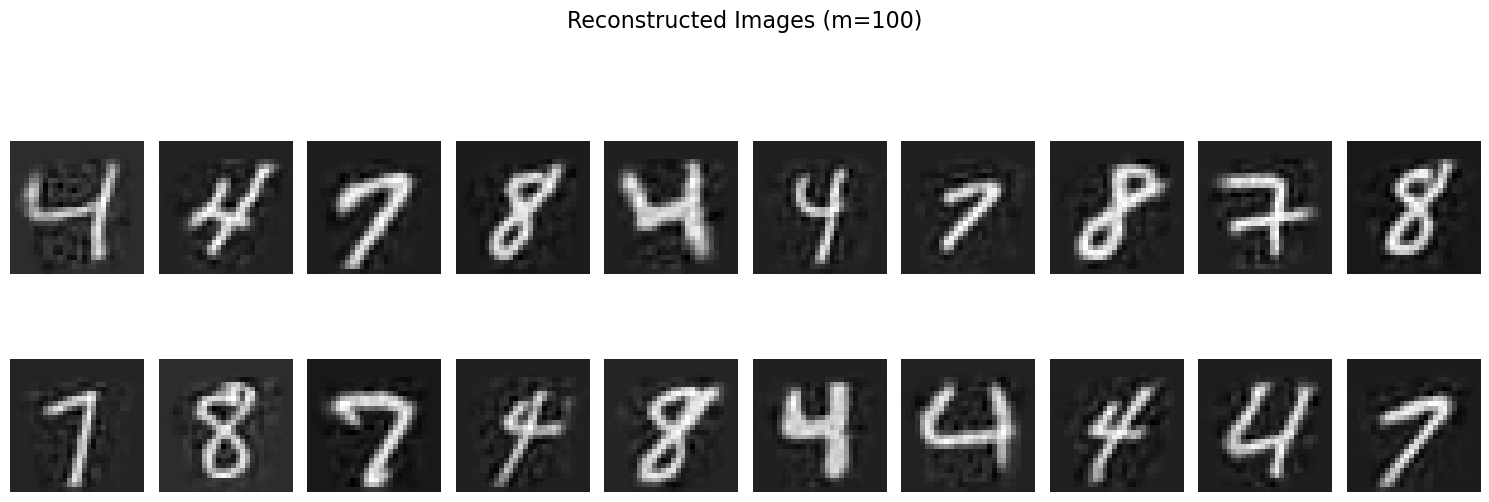

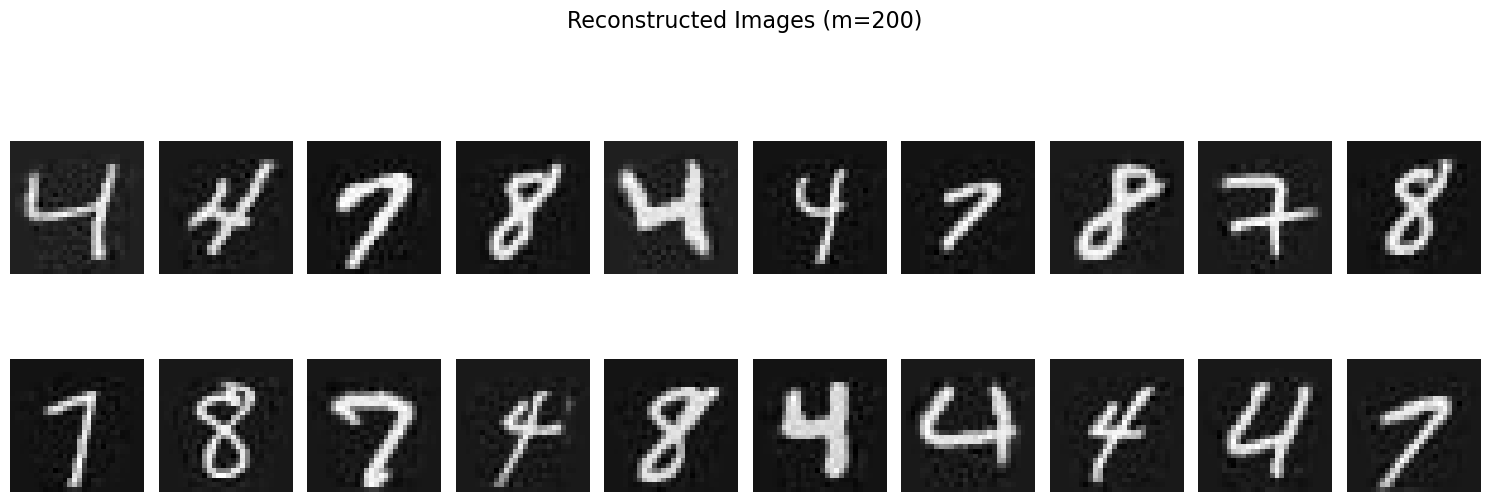

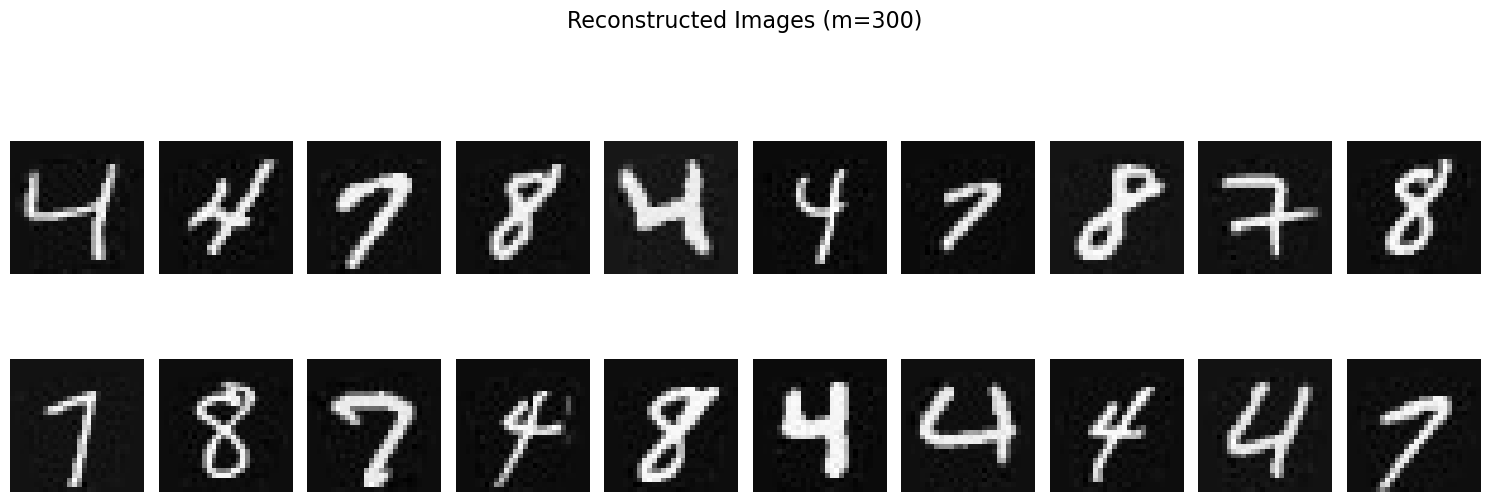

c:\Users\admin\anaconda3\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\admin\anaconda3\lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


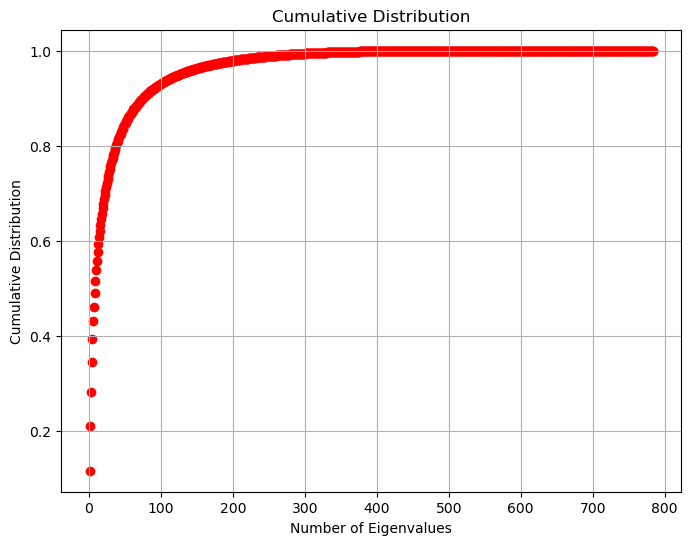

Dimensions required for 0.98 variance: 204


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Select only digits 4, 7, and 8
digits = [4, 7, 8]
selected_indices = np.where(np.isin(y_train, digits))[0]
X_selected = X_train[selected_indices]
y_selected = y_train[selected_indices]

# Reshape and normalize the data
X_selected = X_selected.reshape(-1, 28*28) / 255.0

# Take a subset of the data for PCA
X_train_subset = X_selected[:900]

# Define PCA dimensions
pca_dimensions = [2, 10, 50, 100, 200, 300]

# Function to plot images in a grid layout
def plot_images(images, title):
    num_images = images.shape[0]
    num_cols = 10  # Number of columns in the grid layout
    num_rows = -(-num_images // num_cols)  # Ceiling division to ensure all images are displayed
    plt.figure(figsize=(15, 3 * num_rows))
    plt.suptitle(title, fontsize=16)
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot original images only once
plot_images(X_train_subset[:20], title='Original Images')

# Iterate over different PCA dimensions
for m in pca_dimensions:
    # Compute sample covariance matrix
    cov_matrix = np.cov(X_train_subset.T)
    
    # Compute eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Compute the cumulative distribution
    cumulative_distribution = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
    
    # Reconstruct the data using the first m principal components
    principal_components = sorted_eigenvectors[:, :m]
    X_reconstructed = np.dot(X_train_subset - np.mean(X_train_subset, axis=0), principal_components).dot(principal_components.T) + np.mean(X_train_subset, axis=0)
    
    # Ensure reconstructed images are of type float
    X_reconstructed = np.real(X_reconstructed)
    
    # Display reconstructed images and cumulative distribution
    plot_images(X_reconstructed[:20], title=f'Reconstructed Images (m={m})')
    
    # Check at which dimension cumulative distribution exceeds 0.98
    m_for_98_variance = np.argmax(cumulative_distribution >= 0.98) + 1

    
# Plot cumulative distribution
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(1, len(eigenvalues) + 1), cumulative_distribution, color='red')
plt.title(f'Cumulative Distribution')
plt.xlabel('Number of Eigenvalues')
plt.ylabel('Cumulative Distribution')
plt.grid(True)
plt.show()

print(f'Dimensions required for 0.98 variance: {m_for_98_variance}')
